<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

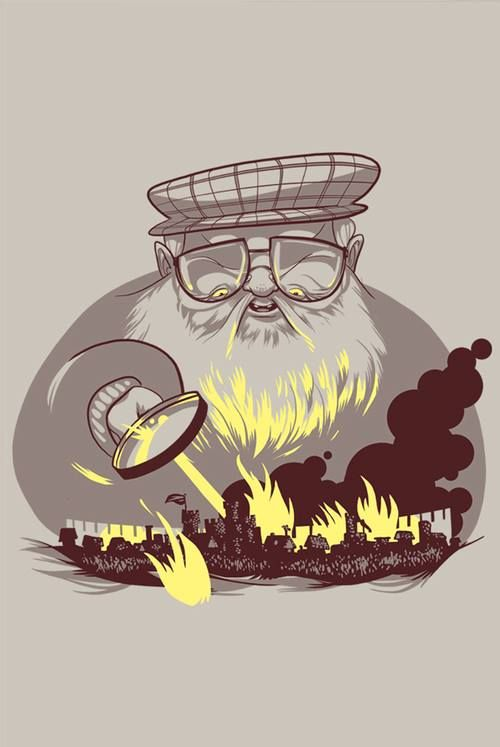

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import phik

In [3]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [4]:
TEST_SIZE = 0.2
RANDOM_STATE = 654321

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5]:
data_train_path = '../data/game_of_thrones_train.csv'
data_test_path = '../data/game_of_thrones_test.csv'

data_train = pd.read_csv(data_train_path, index_col=0)
data_test = pd.read_csv(data_test_path, index_col=0)

In [6]:
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [8]:
missing_percent = data_train.isnull().sum() / len(data_train) * 100
missing_percent

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
mother              98.843931
father              98.587026
heir                98.651252
house               24.470135
spouse              87.154785
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother       98.843931
isAliveFather       98.587026
isAliveHeir         98.651252
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [9]:
data_train.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [10]:
threshold = 0.15 * len(data_train)
data_train = data_train.dropna(thresh=threshold, axis=1)

data_test = data_test[data_train.drop('isAlive', axis=1).columns]

In [11]:
data_train['date'] = data_train['dateOfBirth'] + data_train['age']
data_test['date'] = data_test['dateOfBirth'] + data_test['age']

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [12]:
data_train['isPopular'] = np.where(data_train['popularity'] >= 0.5, 1, 0)
data_test['isPopular'] = np.where(data_test['popularity'] >= 0.5, 1, 0)

In [13]:
data_train['boolDeadRelations'] = np.where(data_train['numDeadRelations'] >= 1, 1, 0)
data_test['boolDeadRelations'] = np.where(data_test['numDeadRelations'] >= 1, 1, 0)

In [14]:
names = sorted(data_train['culture'].dropna().unique())

grouped_names = {}

for name in names:
    key = name.lower()[:4]
    
    if key not in grouped_names:
        grouped_names[key] = []
    
    grouped_names[key].append(name)

for key, group in grouped_names.items():
    print(f"{key}: {group}")

anda: ['Andal', 'Andals']
asta: ['Astapori']
braa: ['Braavos', 'Braavosi']
cran: ['Crannogmen']
dorn: ['Dorne', 'Dornish', 'Dornishmen']
doth: ['Dothraki']
firs: ['First Men']
free: ['Free Folk', 'Free folk', 'free folk']
ghis: ['Ghiscari', 'Ghiscaricari']
iron: ['Ironborn', 'Ironmen', 'ironborn']
lhaz: ['Lhazareen', 'Lhazarene']
lyse: ['Lysene', 'Lyseni']
meer: ['Meereenese']
myri: ['Myrish']
nort: ['Northern mountain clans', 'Northmen', 'northmen']
norv: ['Norvoshi']
pent: ['Pentoshi']
qart: ['Qarth', 'Qartheen']
qoho: ['Qohor']
reac: ['Reach']
rive: ['Rivermen']
sist: ['Sistermen']
stor: ['Stormlands']
summ: ['Summer Islander', 'Summer Islands', 'Summer Isles']
tyro: ['Tyroshi']
vale: ['Vale', 'Vale mountain clans', 'Valemen']
valy: ['Valyrian']
west: ['Westerlands', 'Westerman', 'Westermen', 'Westeros', 'westermen']
wild: ['Wildling']


In [15]:
data_train['culture'] = data_train['culture'].apply(lambda x: x.lower()[:4] if pd.notna(x) else x)
data_test['culture'] = data_test['culture'].apply(lambda x: x.lower()[:4] if pd.notna(x) else x)
data_train['culture'].dropna()

S.No
2       rive
5       dorn
7       valy
16      iron
26      free
        ... 
1533    ghis
1541    nort
1548    vale
1549    doth
1556    cran
Name: culture, Length: 488, dtype: object

In [16]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [17]:
def corr(df):
    """
    Строит тепловую карту корреляций между признаками в датафрейм, используя метод phi-k.

    Параметры:
    -----------
    df : DataFrame
        Датафрейм, содержащий данные для анализа. Ожидается, что в нем содержатся численные 
        и категориальные признаки для вычисления корреляций.

    Возвращает:
    -----------
    None
        Функция отображает тепловую карту, но не возвращает значений.

    Примечания:
    -----------
    Тепловая карта отображает значения корреляции между признаками на уровне от -1 до 1,
    где -1 указывает на полное отрицательное взаимодействие, а 1 - на полное положительное.
    Значения аннотированы на тепловой карте с заданными параметрами шрифта.
    """

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        df.phik_matrix(),
        vmin=-1,
        vmax=1,
        linewidths=1,
        annot=True,
        annot_kws={"fontsize": 5, "fontweight": "bold"},
        fmt=".2f",
    )

interval columns not set, guessing: ['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'date', 'isPopular', 'boolDeadRelations']


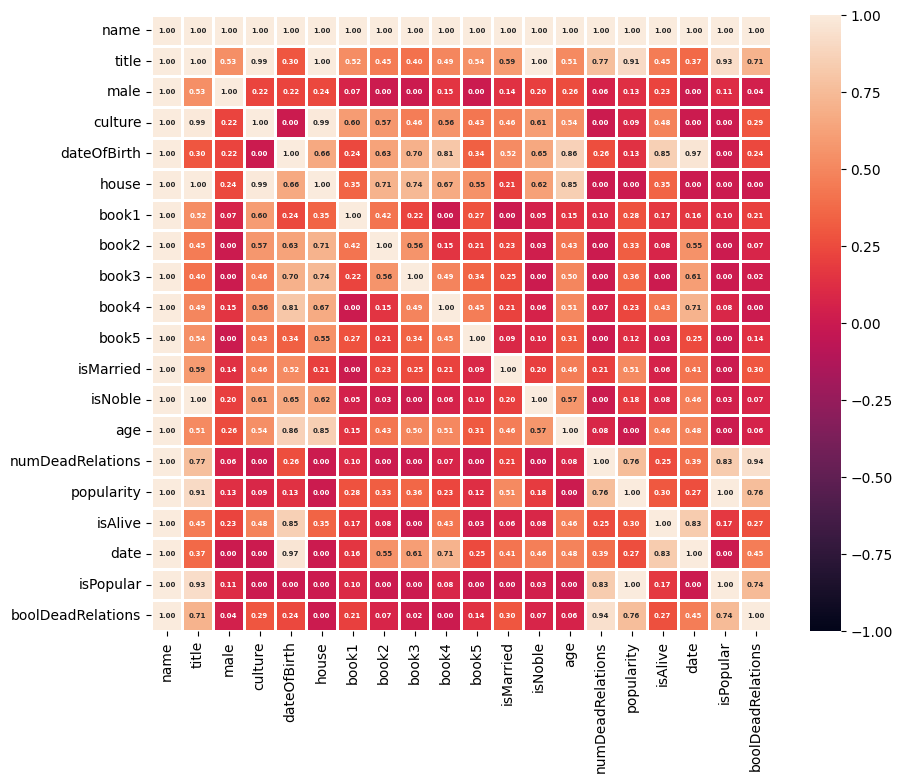

In [18]:
corr(data_train)

In [19]:
data_train.drop(columns=['name'], inplace = True)
data_test.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [20]:
data_train.isAlive.value_counts(normalize=True)

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [21]:
# Корреляция приведена выше, обработка категориальных признаков будет в пайплайне

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [22]:
# Честно - лень делать. Скажу, что это также есть в корреляционном анализе. Не обижусь, если сократите балл.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [23]:
X = data_train.drop(columns=['isAlive'])
y = data_train.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [26]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Я тут немного изменил структуру тетрадки, чтобы проще в дальнейшем было работать с моделями**

In [27]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [28]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from copy import deepcopy

In [29]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [30]:
X_train_fillna = X_train.fillna(-1)
X_test_fillna = X_test.fillna(-1)

In [31]:
numerical_features = X_train_fillna.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_fillna.select_dtypes(include=['object', 'category']).columns.tolist()

X_train_fillna[categorical_features] = X_train_fillna[categorical_features].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_features)
    ]
)

In [32]:
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=RANDOM_STATE),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(random_state=RANDOM_STATE),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(random_state=RANDOM_STATE),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'LGBM': LGBMClassifier(random_state=RANDOM_STATE, verbose=-1) 
}

In [33]:
pipelines = {name: Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
]) for name, clf in classifiers.items()}

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [34]:
predictions = {}
for model_name, model in pipelines.items():
    print(f'{model_name} processing')
    model.fit(X_train_fillna, y_train)
    preds = model.predict(X_test_fillna)
    predictions[model_name] = preds

LogisticRegression processing
AdaBoost processing
RandomForest processing
KNeighbors processing
SVC processing
DecisionTree processing
LGBM processing


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [35]:
# сделано

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [36]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [37]:
for model_name, pred in predictions.items():
    print(model_name)
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy : %.4f" % accuracy)

LogisticRegression
Accuracy : 0.8045
AdaBoost
Accuracy : 0.8301
RandomForest
Accuracy : 0.8590
KNeighbors
Accuracy : 0.8141
SVC
Accuracy : 0.8141
DecisionTree
Accuracy : 0.8365
LGBM
Accuracy : 0.8590


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [38]:
# сделано

Проведём подбор гиперпараметров с помощью библиотеки `optuna`.

In [39]:
def objective(trial):
    # Определение диапазонов гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    # Инициализация модели
    model = deepcopy(pipelines['RandomForest'])

    model.set_params(classifier__n_estimators=n_estimators,
                     classifier__max_depth=max_depth,
                     classifier__min_samples_split=min_samples_split)

    # Кросс-валидация и расчет средней точности
    scores = cross_val_score(model, X_train_fillna, y_train, cv=5, scoring='accuracy')  # 5-кратная кросс-валидация
    accuracy = scores.mean()  # Средняя точность по кросс-валидации

    # Возврат метрики, которую нужно оптимизировать
    return accuracy

# Создание объекта study и оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Вывод лучших гиперпараметров
print('Best hyperparameters: {}'.format(study.best_params))
print('Best accuracy: {}'.format(study.best_value))

  0%|          | 0/30 [00:00<?, ?it/s]

Best hyperparameters: {'n_estimators': 62, 'class_weight': None, 'max_depth': 32, 'min_samples_split': 8}
Best accuracy: 0.8602409638554217


In [40]:
best_params = study.best_params

best_RFC = deepcopy(pipelines['RandomForest'])

best_RFC.set_params(classifier__n_estimators=best_params['n_estimators'],
                     classifier__max_depth=best_params['max_depth'],
                     classifier__min_samples_split=best_params['min_samples_split'],
                     classifier__class_weight=best_params['class_weight'])

best_RFC.fit(X_train_fillna, y_train);

In [41]:
pred = best_RFC.predict(X_test_fillna)
accuracy = accuracy_score(y_test, pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8397


In [42]:
def objective(trial):
    # Определение диапазонов гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    num_leaves = trial.suggest_int('num_leaves', 2, 256)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100)
    lambda_l1 = trial.suggest_loguniform('lambda_l1', 1e-8, 10.0)
    lambda_l2 = trial.suggest_loguniform('lambda_l2', 1e-8, 10.0)

    # Инициализация модели
    model = deepcopy(pipelines['LGBM'])

    model.set_params(classifier__n_estimators=n_estimators,
                     classifier__max_depth=max_depth,
                     classifier__min_samples_split=min_samples_split)

    # Кросс-валидация и расчет средней точности
    scores = cross_val_score(model, X_train_fillna, y_train, cv=5, scoring='accuracy')  # 5-кратная кросс-валидация
    accuracy = scores.mean()  # Средняя точность по кросс-валидации

    # Возврат метрики, которую нужно оптимизировать
    return accuracy

# Создание объекта study и оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Вывод лучших гиперпараметров
print('Best hyperparameters: {}'.format(study.best_params))
print('Best accuracy: {}'.format(study.best_value))

  0%|          | 0/100 [00:00<?, ?it/s]

Best hyperparameters: {'n_estimators': 62, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 14, 'num_leaves': 173, 'min_child_samples': 62, 'lambda_l1': 1.9956705343789481e-07, 'lambda_l2': 1.2038446200680012e-06}
Best accuracy: 0.8755020080321284


In [43]:
# Создание нового пайплайна best_LGBM с лучшими параметрами
best_params = study.best_params

# Копирование существующего пайплайна и обновление гиперпараметров
best_LGBM = deepcopy(pipelines['LGBM'])

# Установка лучших гиперпараметров
best_LGBM.set_params(classifier__n_estimators=best_params['n_estimators'],
                     classifier__max_depth=best_params['max_depth'],
                     classifier__class_weight=best_params['class_weight'],
                    classifier__min_samples_split=best_params['min_samples_split'],
                    classifier__num_leaves=best_params['num_leaves'],
                    classifier__min_child_samples=best_params['min_child_samples'],
                    classifier__lambda_l1=best_params['lambda_l1'],
                    classifier__lambda_l2=best_params['lambda_l2'])

# Теперь вы можете использовать best_LGBM для обучения на ваших данных
best_LGBM.fit(X_train_fillna, y_train);

In [44]:
pred = best_LGBM.predict(X_test_fillna)
accuracy = accuracy_score(y_test, pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


Лучшее решение выберем читерски и неправильно - просто проведём сабмиты. Пробовал `ADASYN` - метрика падает на сотую.

### Файл `submission.csv`

Сабмит дефолтного RFC - 0.8149  
Сабмит дефолтного LGBM - 0.5989  
Сабмит RFC с подбором гипер параметров - 0.7994  
Сабмит LGBM с подбором гипер параметров - 0.5938

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

Как сохранить измененный Pandas DataFrame в csv файл:

In [45]:
predictions = pipelines['RandomForest'].fit(X_train_fillna, y_train).predict(data_test)
submission = pd.DataFrame(predictions, index=data_test.index, columns=['isAlive'])

In [46]:
submission.to_csv("new_submission.csv", index=False)